<a href="https://colab.research.google.com/github/IldarAltynbaev/MLSnippetSimpleNeuroNwtwork/blob/TestingColab/FullConnectedNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import random
import numpy as np
import torchvision.datasets
import matplotlib.pyplot as plt

random.seed(0)
torch.manual_seed(0)
np.random.seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [25]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MSINT_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [26]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MSINT_test.test_data
y_test = MSINT_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [27]:
X_train = X_train.float()
X_test = X_test.float()
len(X_train)

60000

In [28]:
# plt.imshow(X_train[0, :, :])
# plt.show()
# print(y_train[0])

In [29]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [30]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

In [31]:
mnist_net = MNISTNet(100)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [32]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)

        preds = mnist_net.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test.data).data)

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9091)
tensor(0.9176)
tensor(0.9197)
tensor(0.9212)
tensor(0.9271)
tensor(0.9299)
tensor(0.9263)
tensor(0.9299)
tensor(0.9324)
tensor(0.9330)
tensor(0.9296)
tensor(0.9330)
tensor(0.9311)
tensor(0.9371)
tensor(0.9405)
tensor(0.9424)
tensor(0.9365)
tensor(0.9340)
tensor(0.9370)
tensor(0.9396)
tensor(0.9370)
tensor(0.9325)
tensor(0.9378)
tensor(0.9418)
tensor(0.9404)
tensor(0.9400)
tensor(0.9427)
tensor(0.9439)
tensor(0.9411)
tensor(0.9479)
tensor(0.9429)
tensor(0.9477)
tensor(0.9463)
tensor(0.9495)
tensor(0.9416)
tensor(0.9413)
tensor(0.9446)
tensor(0.9452)
tensor(0.9485)
tensor(0.9469)
tensor(0.9446)
tensor(0.9475)
tensor(0.9438)
tensor(0.9439)
tensor(0.9408)
tensor(0.9451)
tensor(0.9449)
tensor(0.9473)
tensor(0.9442)
tensor(0.9460)
tensor(0.9466)
tensor(0.9498)
tensor(0.9464)
tensor(0.9496)
tensor(0.9484)
tensor(0.9487)
tensor(0.9484)
tensor(0.9481)
tensor(0.9517)
tensor(0.9490)
tensor(0.9516)
tensor(0.9514)
tensor(0.9561)
tensor(0.9520)
tensor(0.9506)
tensor(0.9506)
tensor(0.9

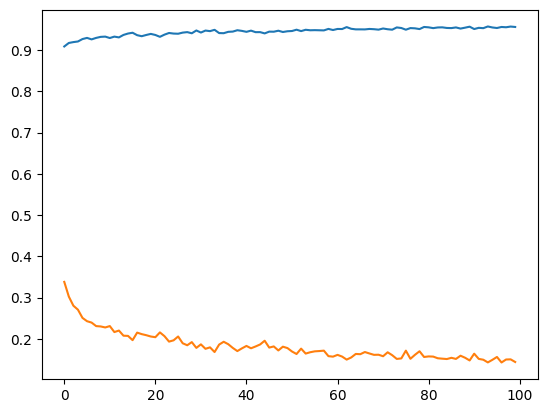

In [33]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);